by:

Resonance Grup
- Christi Vidya
- Indri Dayanah
- Karenia Emeralda

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.simplefilter('ignore')
df = pd.read_csv('https://raw.githubusercontent.com/indri-dayanah/ChurnPrediction/main/data%20churn.csv',sep=',')

In [2]:
#Top 5 Data
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


#EDA (Exploratory Data Analysis)

In [3]:
print('Ukuran dataset: %d baris dan %d kolom' %df.shape)

print('\nInfo dataset:')
print(df.info())

print('\nDuplikasi data:', df.duplicated().sum())

Ukuran dataset: 4250 baris dan 20 kolom

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float6

There's no missing value data

##Descriptive Analysis

In [4]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,4250,51,WV,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_length,4250,NaN,NaN,NaN,100.236,39.6984,1,73,100,127,243
area_code,4250,3,area_code_415,2108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
international_plan,4250,2,no,3854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice_mail_plan,4250,2,no,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_vmail_messages,4250,NaN,NaN,NaN,7.63176,13.4399,0,0,0,16,52
total_day_minutes,4250,NaN,NaN,NaN,180.26,54.0124,0,143.325,180.45,216.2,351.5
total_day_calls,4250,NaN,NaN,NaN,99.9073,19.8508,0,87,100,113,165
total_day_charge,4250,NaN,NaN,NaN,30.6447,9.1821,0,24.365,30.68,36.75,59.76
total_eve_minutes,4250,NaN,NaN,NaN,200.174,50.2495,0,165.925,200.7,233.775,359.3


##Churn Proportion

In [5]:
df.churn.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

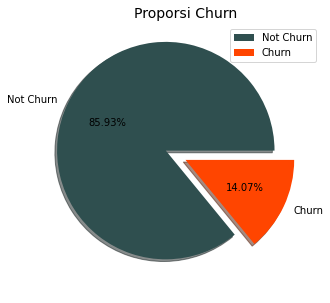

In [6]:
labels = ['Not Churn','Churn']
size = [3652,598]
colors = ['darkslategrey','orangered']
explode = [0.2,0]

plt.rcParams['figure.figsize']=(5,5)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True,autopct='%.2f%%')
plt.title('Proporsi Churn',fontsize=14)
plt.axis('off')
plt.legend(labels, loc='best')
plt.show()

##Churn Category per Area Code

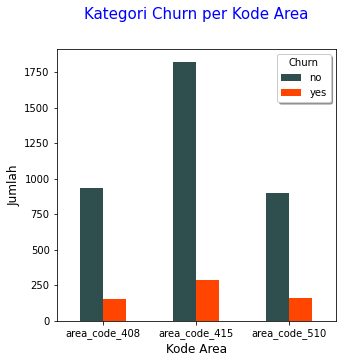

In [7]:
import matplotlib.pyplot as plt
df.groupby(['area_code','churn']).size().unstack().plot(kind='bar',color = ('darkslategrey','orangered'))
plt.title('Kategori Churn per Kode Area', loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('Kode Area',fontsize=12)
plt.ylabel('Jumlah',fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True,title='Churn')
plt.xticks(rotation=0)
plt.show()

In [8]:
CT = pd.crosstab(index=df["area_code"], columns=df["churn"])

In [9]:
CT

churn,no,yes
area_code,,
area_code_408,934,152
area_code_415,1821,287
area_code_510,897,159


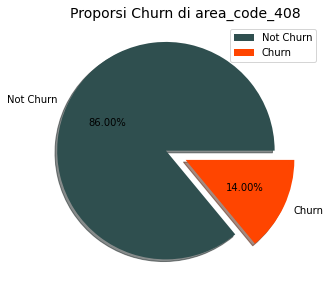

In [10]:
labels = ['Not Churn','Churn']
size = [934,152]
colors = ['darkslategrey','orangered']
explode = [0.2,0]

plt.rcParams['figure.figsize']=(5,5)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True,autopct='%.2f%%')
plt.title('Proporsi Churn di area_code_408',fontsize=14)
plt.axis('off')
plt.legend(labels, loc='best')
plt.show()

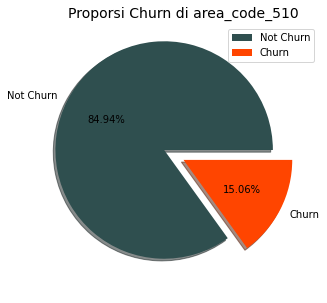

In [11]:
labels = ['Not Churn','Churn']
size = [897,159]
colors = ['darkslategrey','orangered']
explode = [0.2,0]

plt.rcParams['figure.figsize']=(5,5)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True,autopct='%.2f%%')
plt.title('Proporsi Churn di area_code_510',fontsize=14)
plt.axis('off')
plt.legend(labels, loc='best')
plt.show()

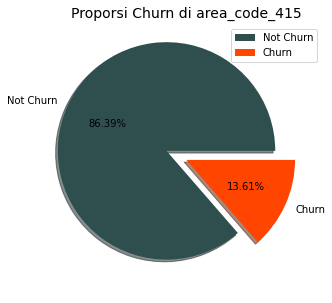

In [12]:
labels = ['Not Churn','Churn']
size = [1821,287]
colors = ['darkslategrey','orangered']
explode = [0.2,0]

plt.rcParams['figure.figsize']=(5,5)
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True,autopct='%.2f%%')
plt.title('Proporsi Churn di area_code_415',fontsize=14)
plt.axis('off')
plt.legend(labels, loc='best')
plt.show()

##Churn Category per International Plan


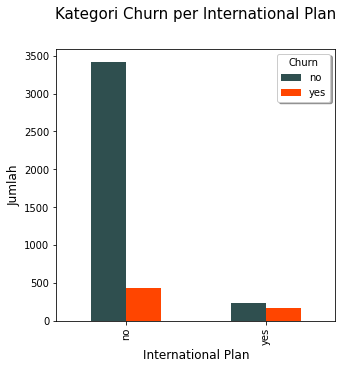

In [13]:
import matplotlib.pyplot as plt
df.groupby(['international_plan','churn']).size().unstack().plot(kind='bar', color = ('darkslategrey','orangered'))
plt.title('Kategori Churn per International Plan', loc='center',pad=30,fontsize=15,color='black')
plt.xlabel('International Plan',fontsize=12)
plt.ylabel('Jumlah',fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True,title='Churn')
plt.show()

##Churn Category per Voice Mail Plan

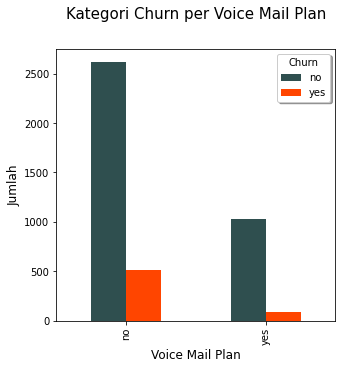

In [14]:
import matplotlib.pyplot as plt
df.groupby(['voice_mail_plan','churn']).size().unstack().plot(kind='bar', color = ('darkslategrey','orangered'))
plt.title('Kategori Churn per Voice Mail Plan', loc='center',pad=30,fontsize=15,color='black')
plt.xlabel('Voice Mail Plan',fontsize=12)
plt.ylabel('Jumlah',fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True,title='Churn')
plt.show()

##Distribution of numerical_features

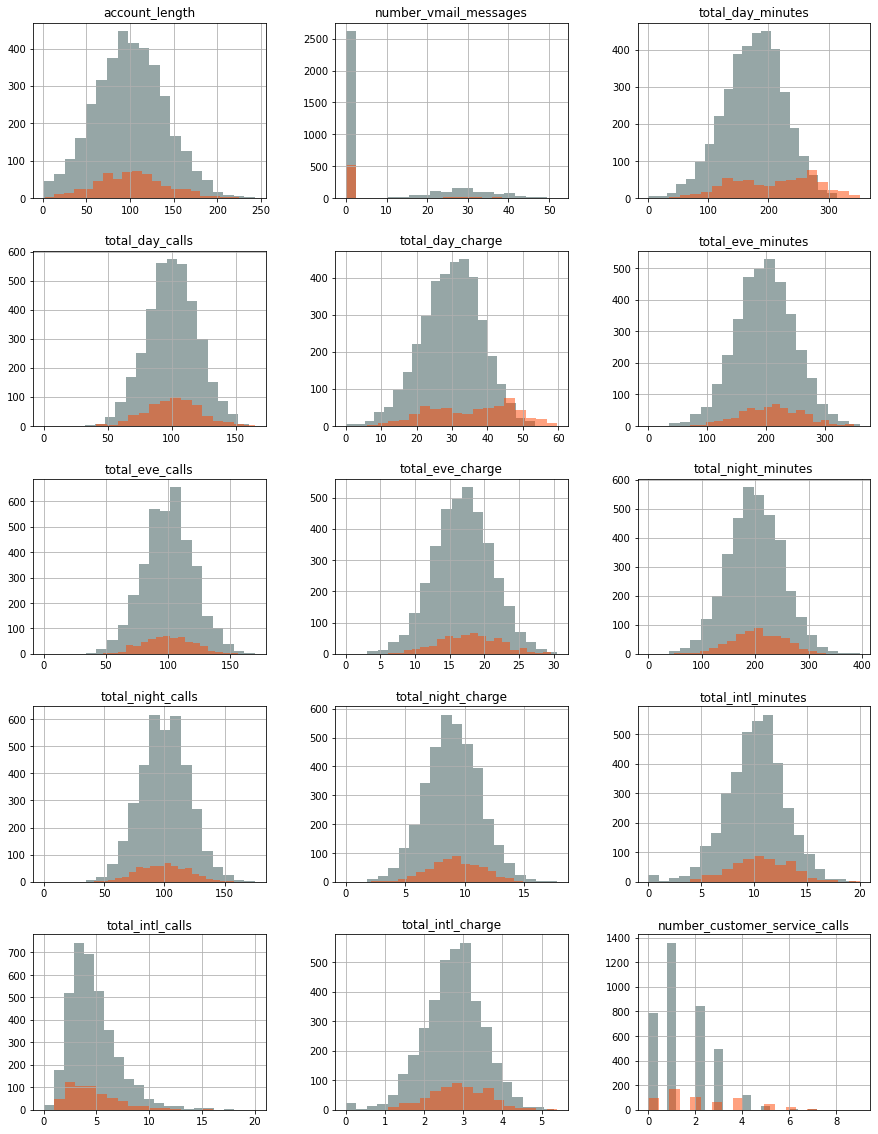

In [15]:
numerical_features = ['account_length',	'number_vmail_messages',	'total_day_minutes',	'total_day_calls',	'total_day_charge',	'total_eve_minutes',	'total_eve_calls',	'total_eve_charge',	'total_night_minutes', 'total_night_calls',	'total_night_charge',	'total_intl_minutes',	'total_intl_calls',	'total_intl_charge',	'number_customer_service_calls']
fig, ax = plt.subplots(5,3,figsize=(15,20))

df[df.churn == 'no'][numerical_features].hist(bins=20,color='darkslategrey',alpha=0.5,ax=ax)
df[df.churn == 'yes'][numerical_features].hist(bins=20,color='orangered',alpha=0.5,ax=ax)
plt.show()

##Churn Customer

In [16]:
churn = df[df['churn']=='yes']

In [17]:
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
12,NY,161,area_code_415,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,yes
17,CO,77,area_code_408,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,yes
26,AZ,12,area_code_408,no,no,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,yes
32,MD,135,area_code_408,yes,yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,yes


In [18]:
churn.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,598,51,NJ,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_length,598,NaN,NaN,NaN,102.137,39.3692,2,76,101,125,225
area_code,598,3,area_code_415,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
international_plan,598,2,no,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice_mail_plan,598,2,no,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_vmail_messages,598,NaN,NaN,NaN,4.29933,11.1246,0,0,0,0,48
total_day_minutes,598,NaN,NaN,NaN,208.99,69.1835,0,151.175,220.55,266.975,351.5
total_day_calls,598,NaN,NaN,NaN,100.478,20.9889,0,87,101,114,165
total_day_charge,598,NaN,NaN,NaN,35.5287,11.7614,0,25.6975,37.495,45.385,59.76
total_eve_minutes,598,NaN,NaN,NaN,209.965,51.3123,70.9,172.15,210.2,248.1,349.4


## No Churn Customer

In [19]:
no_churn = df[df['churn']=='no']

In [20]:
no_churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,3652.0,99.924973,39.748743,1.0,73.0000,99.00,127.0000,243.00
number_vmail_messages,3652.0,8.177437,13.706304,0.0,0.0000,0.00,20.0000,52.00
total_day_minutes,3652.0,175.555093,49.549782,0.0,142.5000,178.25,210.7000,313.80
total_day_calls,3652.0,99.813801,19.659616,0.0,87.0000,100.00,113.0000,160.00
total_day_charge,3652.0,29.844948,8.423424,0.0,24.2300,30.30,35.8200,53.35
total_eve_minutes,3652.0,198.570674,49.897726,0.0,164.5750,199.20,231.7250,359.30
total_eve_calls,3652.0,100.231380,19.936117,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,3652.0,16.878743,4.241312,0.0,13.9875,16.93,19.6925,30.54
total_night_minutes,3652.0,199.577519,50.521152,0.0,165.9750,199.30,233.1250,395.00
total_night_calls,3652.0,99.942771,20.066126,0.0,87.0000,100.00,113.0000,175.00


##Correlation between numerical variable

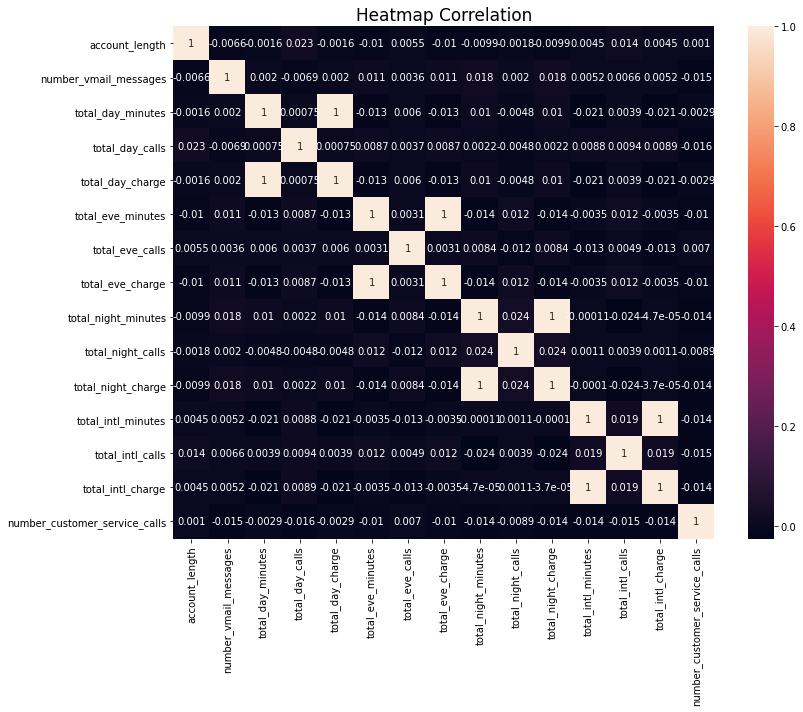

In [21]:
plt.figure(figsize=(12, 10))
plt.title('Heatmap Correlation', size=17)
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

##Detecting Outlier

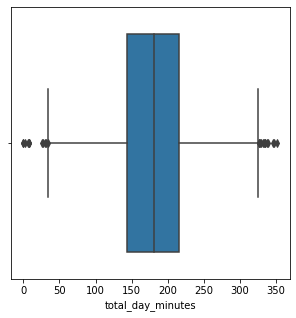

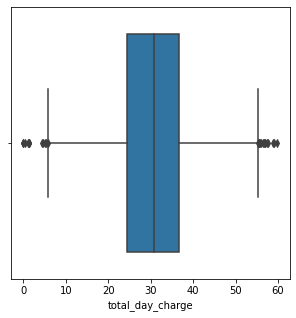

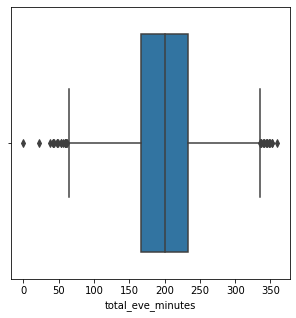

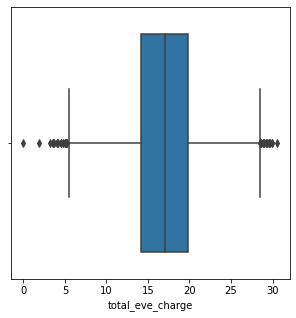

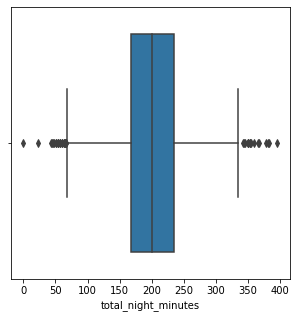

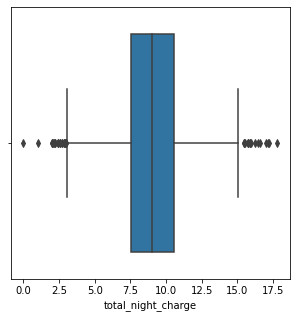

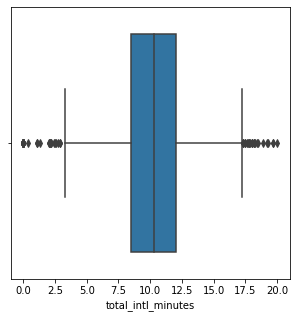

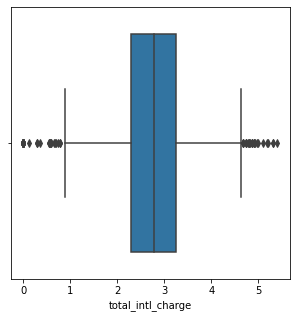

In [22]:
for column in df.columns : 
  if df [column].dtype == np.number:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.show
    
  else: continue

##Handling Outlier
There is outlier for some features, so we handling it with IQR method

In [23]:
for column in list (df.columns) : 
  if df[column].dtype != np.number: continue
  q3 = np.percentile(df[column].dropna(),75)
  q1 = np.percentile(df[column].dropna(),25)
  iqr = q3 - q1
  upper_limit = q3 + (iqr*1.5)
  lower_limit = q1 - (iqr*1.5)
  par = df[column]
  temp = []
  for item in df[column]:
    if item >= upper_limit :
      temp.append(upper_limit)
    elif item <= lower_limit :
      temp.append(lower_limit)
    else:
      temp.append(item)
  df[column] = temp

##Standardization

In [24]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_cat = df.select_dtypes(include = ['object'])

from sklearn.preprocessing import StandardScaler

df_ss = StandardScaler().fit_transform(df_num)
df_ss = pd.DataFrame(df_ss, columns=df_num.columns)

df = pd.concat([df_ss.reset_index(drop=True), df_cat.reset_index(drop=True)],axis=1)

##Encoding Data

Transform categorical features to numeric

In [25]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns : 
  if df [column].dtype == np.number:continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,-5.774466e-17,1.000118,-2.500048,-0.686160,-0.005951,0.674257,3.596633
number_vmail_messages,4250.0,3.798269e-17,1.000118,-0.567911,-0.567911,-0.567911,0.622715,3.301625
total_day_minutes,4250.0,1.683882e-16,1.000118,-2.720923,-0.687478,0.003126,0.668151,2.701596
total_day_calls,4250.0,1.903608e-16,1.000118,-5.033498,-0.650291,0.004671,0.659633,3.279480
total_day_charge,4250.0,-5.804246e-16,1.000118,-2.720442,-0.687576,0.003451,0.667668,2.700534
total_eve_minutes,4250.0,-3.866711e-16,1.000118,-2.725633,-0.686925,0.009671,0.672214,2.710922
total_eve_calls,4250.0,1.949943e-16,1.000118,-5.032413,-0.661926,-0.008865,0.694432,3.507619
total_eve_charge,4250.0,-6.996234e-16,1.000118,-2.725209,-0.687255,0.009738,0.671381,2.709335
total_night_minutes,4250.0,4.457350e-16,1.000118,-2.697630,-0.667518,-0.001094,0.685889,2.716001
total_night_calls,4250.0,2.640641e-16,1.000118,-4.969402,-0.688847,0.007987,0.655048,3.741029


##Splitting Data

In [27]:
from sklearn.model_selection import train_test_split
x=df.drop("churn",axis=1)
y=df["churn"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101, stratify=y)

##Handling Imbalanced Data

In [28]:
from sklearn.utils import resample

X = pd.concat([x_train, y_train], axis=1)

not_churn = X[X.churn==0]
churn = X[X.churn==1]

churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

upsampled = pd.concat([not_churn, churn_upsampled])

print(upsampled.churn.value_counts())

y_train = upsampled.churn
x_train = upsampled.drop('churn', axis=1)

1    2556
0    2556
Name: churn, dtype: int64


#Modelling

##Algorithm Selection

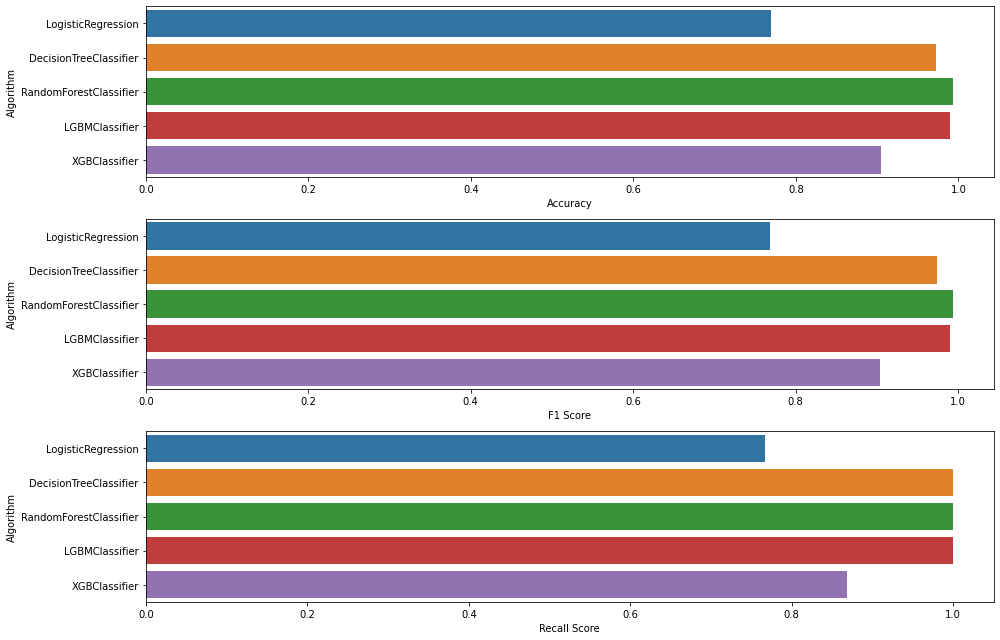

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score

algorithm = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, LGBMClassifier,XGBClassifier]
algo_name = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','LGBMClassifier','XGBClassifier']
algo_ACCScore = []
algo_F1Score = []
algo_RecallScore = []

for item in algorithm:
    model = item()
    F1Scores = cross_val_score(model,x_train,y_train,cv=30,scoring='f1_macro').mean()
    ACCScore = cross_val_score(model,x_train,y_train,cv=30,scoring='accuracy').mean()
    RecallScore = cross_val_score(model,x_train,y_train,cv=30,scoring='recall').mean()
    algo_ACCScore.append(ACCScore)
    algo_F1Score.append(F1Scores)
    algo_RecallScore.append(RecallScore)
    
df_algo = pd.DataFrame({
    'Algorithm' : algo_name,
    'Accuracy' : algo_ACCScore,
    'F1 Score' : algo_F1Score,
    'Recall Score' : algo_RecallScore,
})

plt.figure(figsize=(14,9))   
# Perbandingan algoritma berdasarkan akurasi              
plt.subplot(3,1,1)
sns.barplot(data=df_algo,y='Algorithm',x='Accuracy')
# Perbandingan algorim berdasarkan F1 Score
plt.subplot(3,1,2)
sns.barplot(data=df_algo,y='Algorithm',x='F1 Score')
# Perbandingan algoritma berdasarkan Recall Score
plt.subplot(3,1,3)
sns.barplot(data=df_algo,y='Algorithm',x='Recall Score')

plt.tight_layout()

In [30]:
df_algo

,Algorithm,Accuracy,F1 Score,Recall Score
0,LogisticRegression,0.768787,0.768488,0.767287
1,DecisionTreeClassifier,0.972814,0.974347,0.999608
2,RandomForestClassifier,0.993540,0.994126,0.999608
3,LGBMClassifier,0.990022,0.990019,1.000000
4,XGBClassifier,0.904542,0.904359,0.868573


##Classification Report

In [31]:
lgbm = LGBMClassifier(random_state=101)
lgbm.fit(x_train,y_train)
y_pred = lgbm.predict(x_test)

print('--------------- Classification Report LGBM Classifier ---------------')
print(classification_report(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('TN :',tn,' FP :',fp,' Fn :' ,fn,' TP :' ,tp)

--------------- Classification Report LGBM Classifier ---------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1096
           1       0.93      0.81      0.87       179

    accuracy                           0.96      1275
   macro avg       0.95      0.90      0.92      1275
weighted avg       0.96      0.96      0.96      1275

TN : 1085  FP : 11  Fn : 34  TP : 145


In [32]:
rf = RandomForestClassifier(random_state=101)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

print('--------------- Classification Report Random Forest Classifier ---------------')
print(classification_report(y_test,y_pred_rf))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_rf).ravel()
print('TN :',tn,' FP :',fp,' Fn :' ,fn,' TP :' ,tp)

--------------- Classification Report Random Forest Classifier ---------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1096
           1       0.92      0.75      0.82       179

    accuracy                           0.96      1275
   macro avg       0.94      0.87      0.90      1275
weighted avg       0.95      0.96      0.95      1275

TN : 1084  FP : 12  Fn : 45  TP : 134


In [33]:
dt = DecisionTreeClassifier(random_state=101)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

print('--------------- Classification Report XGB Classifier ---------------')
print(classification_report(y_test,y_pred_dt))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print('TN :',tn,' FP :',fp,' Fn :' ,fn,' TP :' ,tp)

--------------- Classification Report XGB Classifier ---------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1096
           1       0.76      0.73      0.74       179

    accuracy                           0.93      1275
   macro avg       0.86      0.84      0.85      1275
weighted avg       0.93      0.93      0.93      1275

TN : 1054  FP : 42  Fn : 49  TP : 130


In [34]:
xgb = XGBClassifier(random_state=101)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

print('--------------- Classification Report XGB Classifier ---------------')
print(classification_report(y_test,y_pred_xgb))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_xgb).ravel()
print('TN :',tn,' FP :',fp,' Fn :' ,fn,' TP :' ,tp)

--------------- Classification Report XGB Classifier ---------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1096
           1       0.73      0.85      0.79       179

    accuracy                           0.94      1275
   macro avg       0.85      0.90      0.87      1275
weighted avg       0.94      0.94      0.94      1275

TN : 1041  FP : 55  Fn : 27  TP : 152


##Feature Importances

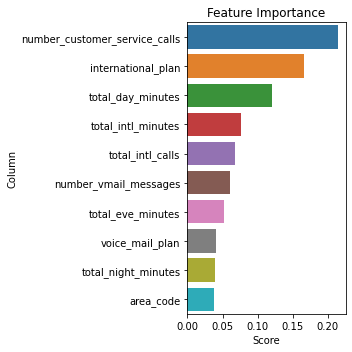

In [35]:
# feature importances with XGB Classifier
score = pd.DataFrame(xgb.feature_importances_, columns=['Score'])
score['Column'] = x.columns
score.head()
# plot feature importances
new_score = score.sort_values(by='Score',ascending=False)
sns.barplot(data=new_score[:10],x='Score',y='Column').set_title('Feature Importance')
plt.tight_layout()

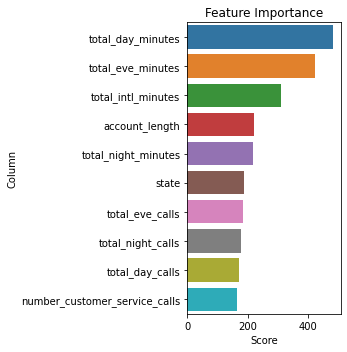

In [36]:
# feature importances with LGBM Classifier
score = pd.DataFrame(lgbm.feature_importances_, columns=['Score'])
score['Column'] = x.columns
score.head()
# plot feature importances
new_score = score.sort_values(by='Score',ascending=False)
sns.barplot(data=new_score[:10],x='Score',y='Column').set_title('Feature Importance')
plt.tight_layout()

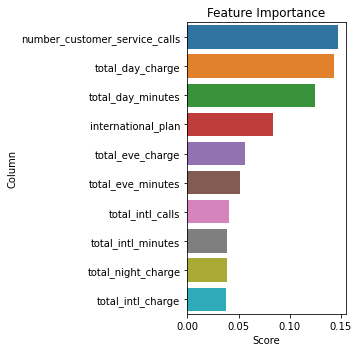

In [37]:
# feature importances with Random Forest
score = pd.DataFrame(rf.feature_importances_, columns=['Score'])
score['Column'] = x.columns
score.head()
# plot feature importances
new_score = score.sort_values(by='Score',ascending=False)
sns.barplot(data=new_score[:10],x='Score',y='Column').set_title('Feature Importance')
plt.tight_layout()

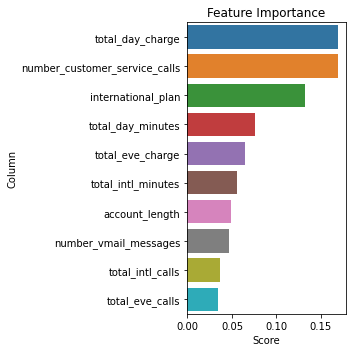

In [38]:
# feature importances with Decision Tree
score = pd.DataFrame(dt.feature_importances_, columns=['Score'])
score['Column'] = x.columns
score.head()
# plot feature importances
new_score = score.sort_values(by='Score',ascending=False)
sns.barplot(data=new_score[:10],x='Score',y='Column').set_title('Feature Importance')
plt.tight_layout()